In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nTarget value counts:")
print(data['target'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0     

In [ ]:
# Split into features and target
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize the features (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

In [ ]:
# Train the model
xgb_classifier.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_classifier.predict(X_test_scaled)
y_pred_proba = xgb_classifier.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model Evaluation:
Accuracy: 0.9610

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.95      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205


Confusion Matrix:
[[ 97   3]
 [  5 100]]


<Figure size 1000x600 with 0 Axes>

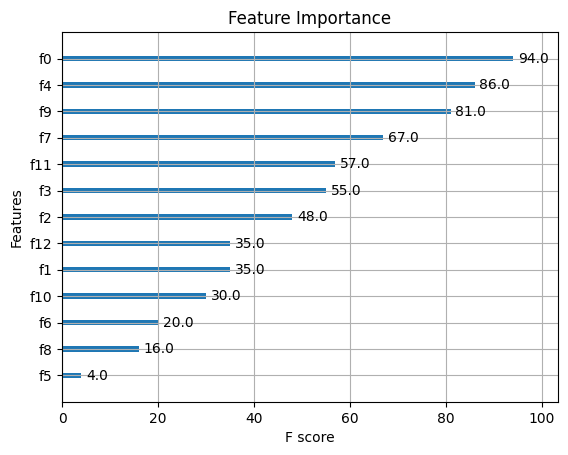

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_classifier)
plt.title('Feature Importance')
plt.show()


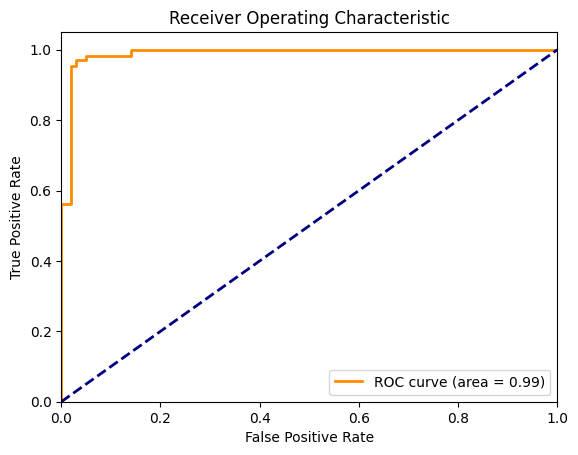

In [ ]:
# Plot ROC curve (optional)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle
import joblib
from google.colab import files

In [ ]:
with open('xgboost_heart_model.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)


In [ ]:
# Alternative: Save using joblib (often better for large models)
joblib.dump(xgb_classifier, 'xgboost_heart_model.joblib')

# Save the scaler as well if you want to reuse it
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [ ]:
files.download('xgboost_heart_model.pkl')
files.download('xgboost_heart_model.joblib')
files.download('scaler.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the saved model and scaler
model_path = '/content/xgboost_heart_model.joblib'  # Update path
scaler_path = '/content/scaler.joblib'  # Update path

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Define the expected features in order
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create test cases with all parameters
test_cases = [
    # Case 1: Typical values (should predict 0 - no heart disease)
    [52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3],

    # Case 2: High-risk values (should predict 1 - heart disease)
    [58, 1, 2, 140, 211, 1, 0, 165, 0, 0.0, 2, 0, 2],

    # Case 3: Borderline values
    [45, 0, 1, 130, 250, 0, 0, 150, 1, 1.5, 1, 0, 2],

    # Add more test cases as needed
]

# Convert to DataFrame
test_df = pd.DataFrame(test_cases, columns=features)

# Display the test cases
print("Test Cases:")
print(test_df)

# Preprocess the test data
test_scaled = scaler.transform(test_df)

# Make predictions
predictions = model.predict(test_scaled)
prediction_probs = model.predict_proba(test_scaled)

# Display results
print("\nPredictions:")
for i, (pred, prob) in enumerate(zip(predictions, prediction_probs)):
    print(f"\nCase {i+1}:")
    print(f"Features: {dict(zip(features, test_cases[i]))}")
    print(f"Prediction: {'Heart Disease' if pred == 1 else 'No Heart Disease'}")
    print(f"Probability: {prob[1]*100:.2f}% chance of heart disease")
    print(f"Confidence: {'High' if max(prob) > 0.7 else 'Medium' if max(prob) > 0.6 else 'Low'}")

# Optional: Detailed prediction breakdown
print("\nModel Details:")
print(f"Model type: {type(model).__name__}")
print("Feature importance:")
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Test Cases:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   58    1   2       140   211    1        0      165      0      0.0      2   
2   45    0   1       130   250    0        0      150      1      1.5      1   

   ca  thal  
0   2     3  
1   0     2  
2   0     2  

Predictions:

Case 1:
Features: {'age': 52, 'sex': 1, 'cp': 0, 'trestbps': 125, 'chol': 212, 'fbs': 0, 'restecg': 1, 'thalach': 168, 'exang': 0, 'oldpeak': 1.0, 'slope': 2, 'ca': 2, 'thal': 3}
Prediction: No Heart Disease
Probability: 4.55% chance of heart disease
Confidence: High

Case 2:
Features: {'age': 58, 'sex': 1, 'cp': 2, 'trestbps': 140, 'chol': 211, 'fbs': 1, 'restecg': 0, 'thalach': 165, 'exang': 0, 'oldpeak': 0.0, 'slope': 2, 'ca': 0, 'thal': 2}
Prediction: Heart Disease
Probability: 94.77% chance of heart disease
Confidence: High

Case 3:
Features: {'age': 45, 'sex': 0, 'cp': 1, 'trestb